In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df.isnull()

#checking for null values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


<Axes: >

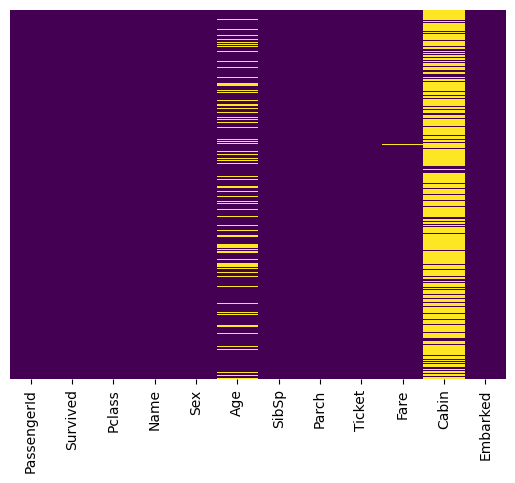

In [5]:
sns.heatmap(df.isnull(), yticklabels = False , cbar = False, cmap = 'viridis')

20% of data is missing in age. proportion of age missing is likely small enough for replacement. looking at the cabin column we are just missing too much data to do something useful. We'll probably drop this or change it to another feature like "cabin known "1 or 0"

<Axes: xlabel='Survived', ylabel='count'>

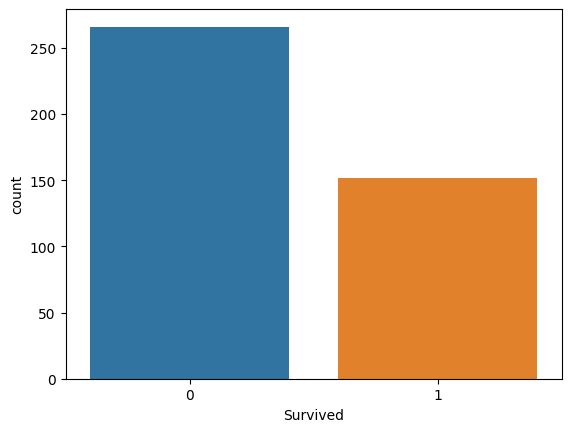

In [6]:
sns.countplot(x = "Survived", data = df)

<Axes: xlabel='Survived', ylabel='count'>

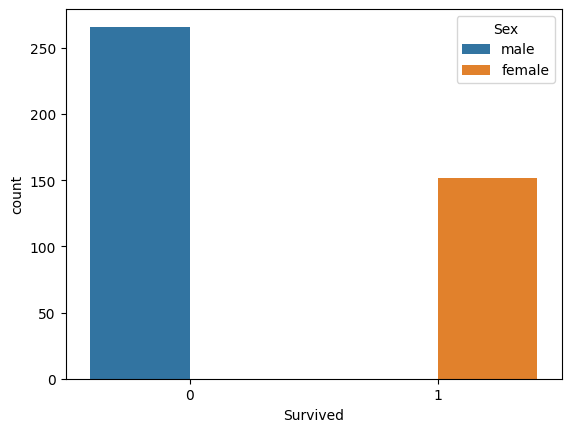

In [7]:
sns.countplot( x = "Survived", hue = 'Sex', data = df)\
#checking surviavlity on the basis of sex

<Axes: xlabel='Survived', ylabel='count'>

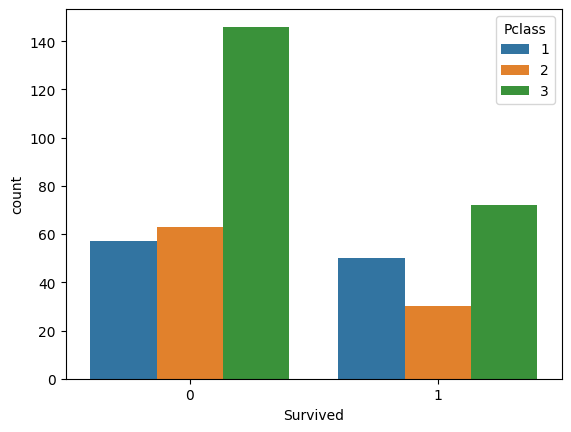

In [8]:
sns.countplot(x = "Survived", hue = 'Pclass', data  = df)
#checking surviavlity on the basis of passenger clas

/tmp/ipykernel_18/2897649060.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(), kde = False, color = 'red', bins = 30)


<Axes: xlabel='Age'>

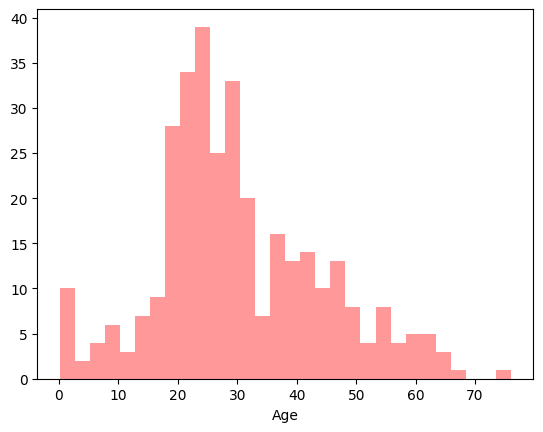

In [9]:
sns.distplot(df['Age'].dropna(), kde = False, color = 'red', bins = 30)
#distribution plot will helps us to detemine the average age on the ship

<Axes: xlabel='SibSp', ylabel='count'>

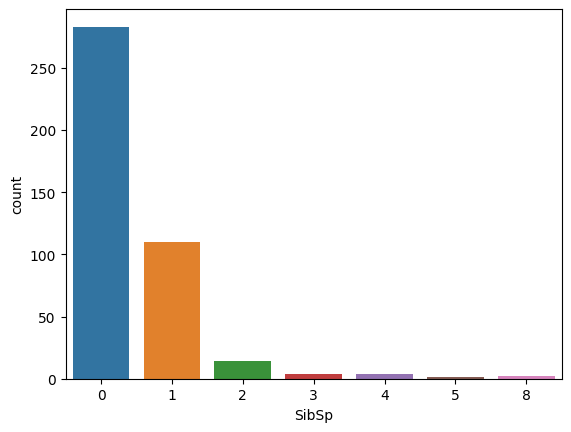

In [10]:
sns.countplot(x = "SibSp", data  =df)

<Axes: >

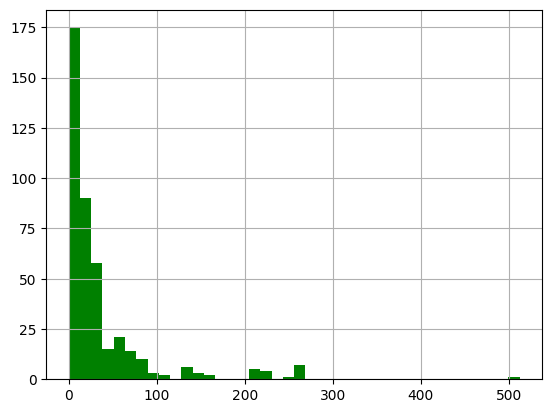

In [11]:
df['Fare'].hist(color = 'green', bins = 40)

Now we will do data cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

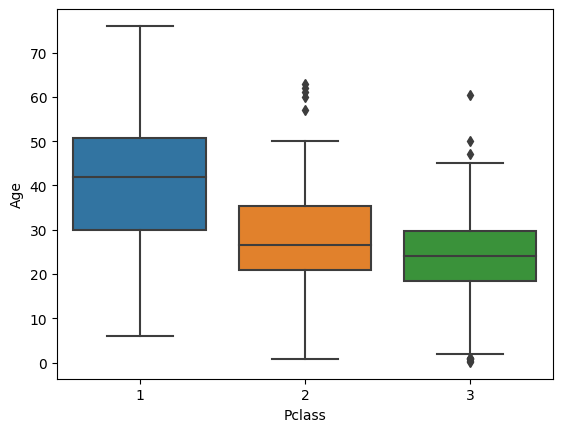

In [12]:
sns.boxplot(x = "Pclass", y = "Age", data = df)
#as we know null values are present in age and cabin column

we can see the wealthier person in the higher classes tend to be older

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass ==1:
            return 37

        elif Pclass == 2:
            return 29
    
        else:
            return 24
        
    else:
        return Age
#As we have seen from the above boxplot the average age in Pclass 1 is 37,avg age in Pclass 2 is 29 and Pclass 3 is 24 so we are repalcing nan values with avg age

In [14]:
df['Age'] = df [["Age", "Pclass"]].apply(impute_age, axis  = 1)

/tmp/ipykernel_18/2163412085.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/tmp/ipykernel_18/2163412085.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

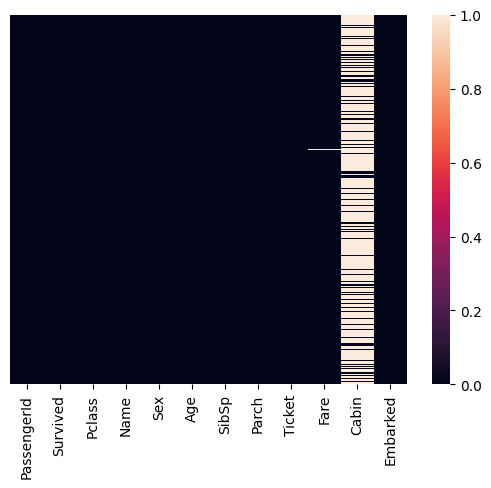

In [15]:
sns.heatmap(df.isnull(), yticklabels = False)

Now here we can see that there is no null values in Age

One nan value is presnt in fare we will replace it with average

In [16]:
df.Fare = df.Fare.fillna(inputs.Fare.mean())

df.isna().sum()

NameError: name 'inputs' is not defined

In [ ]:
df.drop(['PassengerId','Name','SibSp' ,'Ticket', 'Embarked', 'Parch', 'Cabin'], axis= 'columns', inplace = True)

In [ ]:
df

In [ ]:
inputs  = df.drop(['Survived'], axis = 'columns')
target = df.Survived

In [ ]:
inputs.Sex = inputs.Sex.map({'male' : 1 ,'female': 2})

In [ ]:
inputs.Age[:10]

In [ ]:
inputs.head()

.isnan()We will now do train_test_split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target , test_size =0.2 )

In [ ]:
x_train

In [ ]:
len(x_test)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(x_train , y_train)

In [ ]:
model.score(x_train , y_train)
#checking model accuracy